99.8% , 28451074
56.1% , 23230339


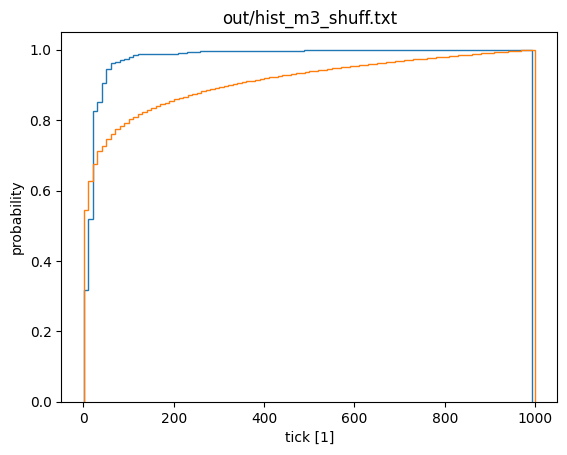

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_for_file(filename, cutoff_ticks=0, prob=False):
    timers, counters = load_histogram_from_file(filename)
    
    # plt.yscale('log')
    plt.title(filename)
    if cutoff_ticks:
        ix = timers < 1_000
    else:
        ix = timers >= 0
    
    print(f"{np.sum(counters[ix])/np.sum(counters)*100:.1f}% , {np.sum(counters)}")
    plt.xlabel("tick [1]")
    if prob:
        plt.ylabel("probability")
        plt.hist(timers[ix], weights=counters[ix], bins=100, histtype='step', cumulative=True, density=True)
    else:
        plt.ylabel("histogram")
        plt.hist(timers[ix], weights=counters[ix], bins=100, histtype='step')
        


def load_histogram_from_file(filename):
    dt_arr = [] 
    cnt_arr = []
    with open(filename) as h:
        it = iter(h)
        next(it)
        for line in it:
            dt, cnt = [int(p.strip()) for p in line.split()]
            dt_arr.append(dt)
            cnt_arr.append(cnt)
    timers = np.array(dt_arr)
    counters = np.array(cnt_arr)
    return timers, counters


_ct=1_000
_prob=True
plot_histogram_for_file("out/hist_m3.txt", cutoff_ticks=_ct, prob=_prob)
#plt.show()
plot_histogram_for_file("out/hist_m3_shuff.txt", cutoff_ticks=_ct, prob=_prob)
#plt.show()
